In [25]:
import tarfile
import os
import pandas as pd
import matplotlib.pyplot as plt


### Extraction

In [26]:

# path to the tar.gz file
tar_path = 'pythia8311_xsec.tar.gz'
extract_path = './extracted_files'

# extract the tar.gz file
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_path)

# path to /xsec_dat in extracted files directory
xsec_dat_path = os.path.join(extract_path, 'xsec_dat')


In [27]:

# get a list of all filenames from /xsec_dat 
file_list = [os.path.join(xsec_dat_path, f) for f in os.listdir(xsec_dat_path) if os.path.isfile(os.path.join(xsec_dat_path, f))]

In [28]:

# read each file into a pandas df
dataframes = {}
for file in file_list:
    try:
        # no header in the files
        df = pd.read_csv(file, delimiter='\t', header=None)
        # store df with filenames
        dataframes[file] = df
    except pd.errors.EmptyDataError:
        print(f"Skipping file with no columns to parse: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")


### Selection

In [29]:

# filter out only filenames matching "main1010_p_16O"*.dat
filtered_dataframes = {file: df for file, df in dataframes.items() if "main1010_p_16O" in file}

print("Filtered filenames:")
for file in filtered_dataframes:
    print(file)

Filtered filenames:
./extracted_files/xsec_dat/main1010_p_16O_1e6_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e11_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e4_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e2_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e3_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e12_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e5_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e7_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e10_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e8_100000.dat
./extracted_files/xsec_dat/main1010_p_16O_1e9_100000.dat


### Plotting

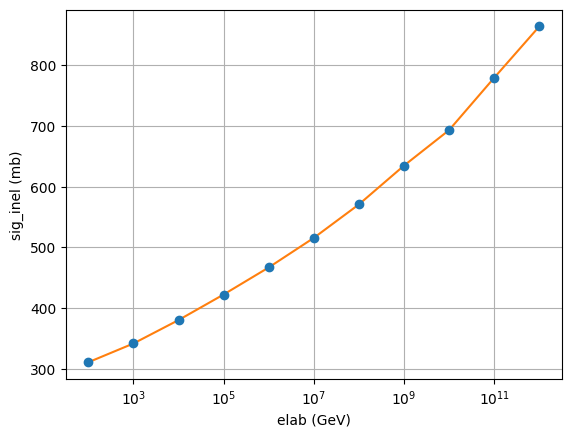

In [32]:
pO_dataframes = []

for file, df in filtered_dataframes.items():
    # extract rows labeled sig_inel, err_inel and elab
    sig_inel = df.loc[df[0] == 'sig_inel', 1].astype(float)
    err_inel = df.loc[df[0] == 'err_inel', 1].astype(float)
    elab = df.loc[df[0] == 'elab', 1].astype(float).values[0]
    
    # plot sig_inel against elab with error bars representing err_inel
    # plt.errorbar(elab, sig_inel, yerr=err_inel, fmt='o', label='')
    
    pO_dataframe = pd.DataFrame({'elab': [elab], 'sig_inel': [sig_inel.values[0]], 'err_inel': [err_inel.values[0]]})
    pO_dataframes.append(pO_dataframe)
pO_dataframe = pd.concat(pO_dataframes, ignore_index=True)
pO_dataframe = pO_dataframe.sort_values(by='elab')

plt.errorbar(pO_dataframe['elab'], pO_dataframe['sig_inel'], yerr=pO_dataframe['err_inel'], fmt='o')
plt.plot(pO_dataframe['elab'], pO_dataframe['sig_inel'], linestyle='-')

plt.xlabel('elab (GeV)')
plt.ylabel('sig_inel (mb)')

plt.xscale('log')
#plt.legend()
plt.grid(True)
plt.show()
